In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [37]:
df = pd.read_csv('data/machine failure.csv')

In [38]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Summary:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1  

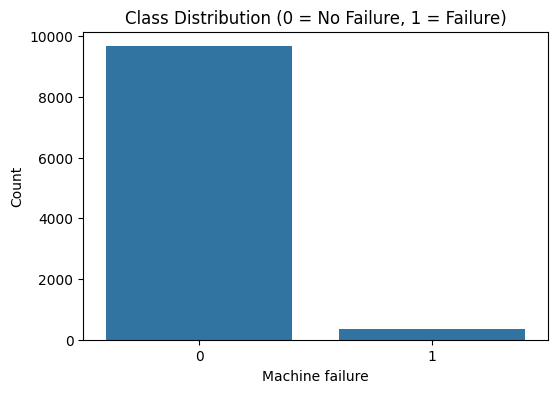

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine failure', data=df)
plt.title('Class Distribution (0 = No Failure, 1 = Failure)')
plt.xlabel('Machine failure')
plt.ylabel('Count')
plt.show()

In [40]:
numeric_df = df.select_dtypes(include=['number'])


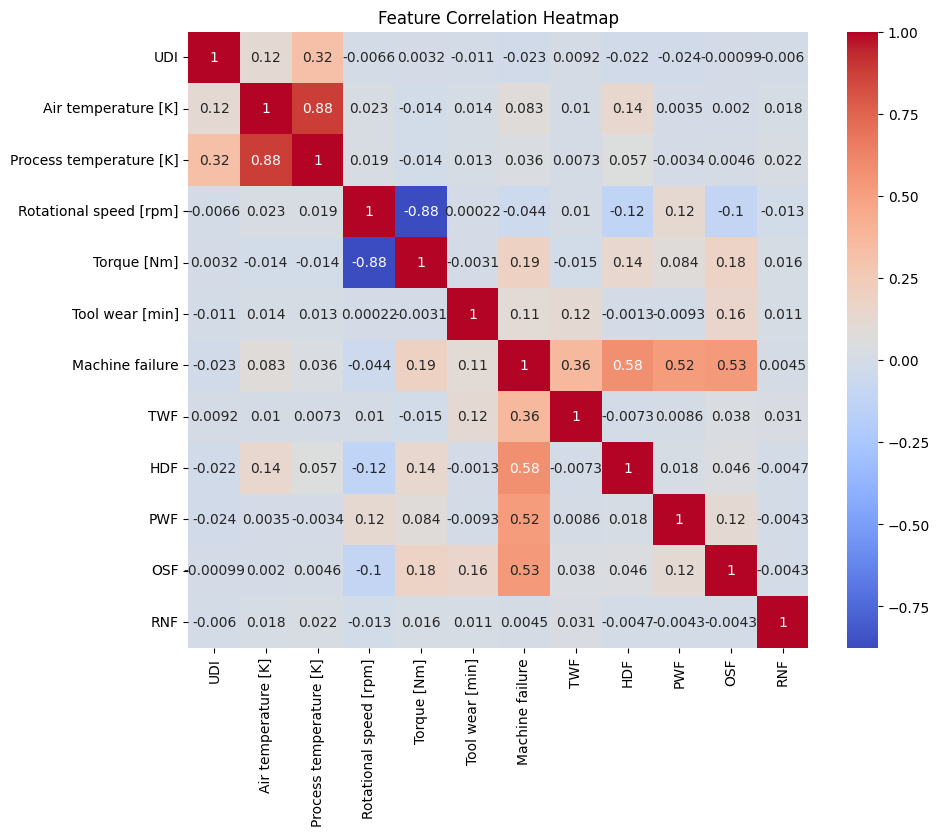

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [42]:
X = df[['Air temperature [K]', 
        'Process temperature [K]', 
        'Rotational speed [rpm]', 
        'Torque [Nm]', 
        'Tool wear [min]']]

y = df['Machine failure']

In [43]:
print("\nFeature Data Sample:")
print(X.head())
print("\nTarget Data Sample:")
print(y.head())


Feature Data Sample:
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  
0         42.8                0  
1         46.3                3  
2         49.4                5  
3         39.5                7  
4         40.0                9  

Target Data Sample:
0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (8000, 5)
Test set size: (2000, 5)


In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [47]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = model.predict(X_test)

In [49]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model Evaluation:
Accuracy: 98.35%

Confusion Matrix:
[[1931    8]
 [  25   36]]


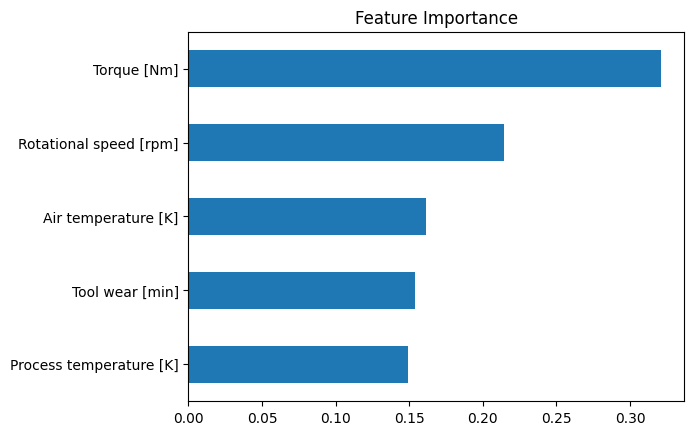

In [50]:
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [51]:
joblib.dump(model, 'fault_detection_model.pkl')
print("\nModel saved as 'fault_detection_model.pkl'.")


Model saved as 'fault_detection_model.pkl'.


In [52]:
sample_data = X_test.iloc[0].values.reshape(1, -1)
sample_prediction = model.predict(sample_data)
print("\nSample Prediction (0 = No Failure, 1 = Failure):", sample_prediction[0])


Sample Prediction (0 = No Failure, 1 = Failure): 0


d:\fault_detection_sensors\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
